In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import os
import utilsCM
import numpy as np
import runCV
savepath = '../../../data-12/' #This needs to change based on step number!

# Predicting using random weights

### Determine parameters over which to do cross-validation

In [8]:
# datapath = '../../../data-00/'
keyword = {'DNNActvtn','ROIpred'}
# layer =  {'conv_1','conv_5','fc_3'}
# Sub = [1,2,3,4]
# ROI = {'EVC','ObjectROI'}
# Keepncomps = list(range(2,42,2))

pretrained_val = True
# RandomWs = True

# Ypredict = 'Word2Sense' #Word2Vec or Word2Sense

In [9]:

runCV.runCV_execute(pretrained_val,savepath,Ypredict='Word2Sense',RandomWs= False)


k-fold regression, independet variable: 2 PCs retained of DNNActvtn from conv_5
k-fold regression, independet variable: 4 PCs retained of DNNActvtn from conv_5
k-fold regression, independet variable: 6 PCs retained of DNNActvtn from conv_5
k-fold regression, independet variable: 8 PCs retained of DNNActvtn from conv_5
k-fold regression, independet variable: 10 PCs retained of DNNActvtn from conv_5
k-fold regression, independet variable: 12 PCs retained of DNNActvtn from conv_5
k-fold regression, independet variable: 14 PCs retained of DNNActvtn from conv_5
k-fold regression, independet variable: 16 PCs retained of DNNActvtn from conv_5
k-fold regression, independet variable: 18 PCs retained of DNNActvtn from conv_5
k-fold regression, independet variable: 20 PCs retained of DNNActvtn from conv_5
k-fold regression, independet variable: 22 PCs retained of DNNActvtn from conv_5
k-fold regression, independet variable: 24 PCs retained of DNNActvtn from conv_5
k-fold regression, independet va

In [10]:
from  matplotlib import pyplot
import seaborn as sns
from pandas import DataFrame as pddf

datapath = '../../../data-12/'
figurepath = '../../../figures-12/'

# pretrained_vec = [True, False]


In [11]:
myDict_median,myDict_max,myDict_count,myDict_mean = runCV.buildDict(datapath,figurepath,Ypredict='Word2Sense',layer={'conv_5'})



In [12]:
len(myDict_count['Metric'])

20

In [13]:
len(myDict_count['ObjectROI'])

20

In [14]:
len(myDict_count['DNNActvtn'])

20

In [15]:
myDict_count.items()

dict_items([('DNNActvtn', [37, 45, 53, 59, 64, 63, 64, 66, 66, 65, 66, 65, 66, 65, 66, 66, 66, 66, 67, 64]), ('ObjectROI_random', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]), ('EVC_random', [2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 3, 2, 1, 1, 2, 1]), ('ObjectROI', [9, 30, 39, 46, 45, 55, 55, 55, 53, 52, 53, 55, 55, 56, 57, 57, 54, 51, 50, 50]), ('EVC', [14, 18, 26, 30, 36, 43, 45, 46, 47, 47, 48, 48, 50, 50, 49, 44, 47, 47, 49, 50]), ('PCs', [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]), ('Metric', ['count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count'])])

In [16]:
df_count = pddf.from_dict(myDict_count).set_index('PCs')
df_mean = pddf.from_dict(myDict_mean).set_index('PCs')
df_max = pddf.from_dict(myDict_max).set_index('PCs')
df_median = pddf.from_dict(myDict_median).set_index('PCs')

In [17]:
allvalues = pd.concat([df_count, df_mean,df_max,df_median], axis=0)

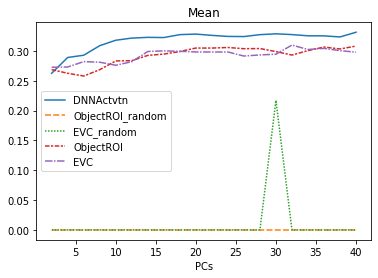

In [18]:
import matplotlib.pyplot as plt

sns.lineplot(data= allvalues[allvalues['Metric'] == 'mean'].iloc[:,0:5]).set_title('Mean')
plt.savefig(figurepath + "Mean.png")

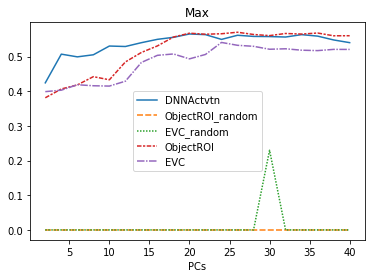

In [19]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'max'].iloc[:,0:5]).set_title('Max')
plt.savefig(figurepath + "Max.png")

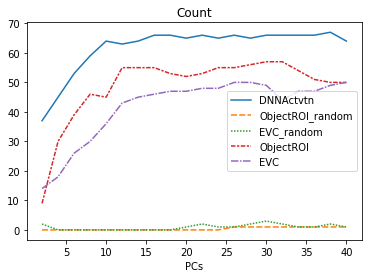

In [20]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'count'].iloc[:,0:5]).set_title('Count')
plt.savefig(figurepath + "Count.png")

In [ ]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'median'].iloc[:,0:5]).set_title('Median')
plt.savefig(figurepath + "Median.png")